#  상권 정보 분석으로 기술 통계 익히기

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 한글 폰트 설정
# '-' 표시 되도록
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 한다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## EDA

In [4]:
# 파일 로드
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep="|")
df.shape

(573680, 39)

In [5]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정
pd.options.display.max_columns = 39
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [7]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 전처리

In [8]:
# 컬럼 별 결측치 수 구하기
n = df.isnull().sum()

<AxesSubplot:>

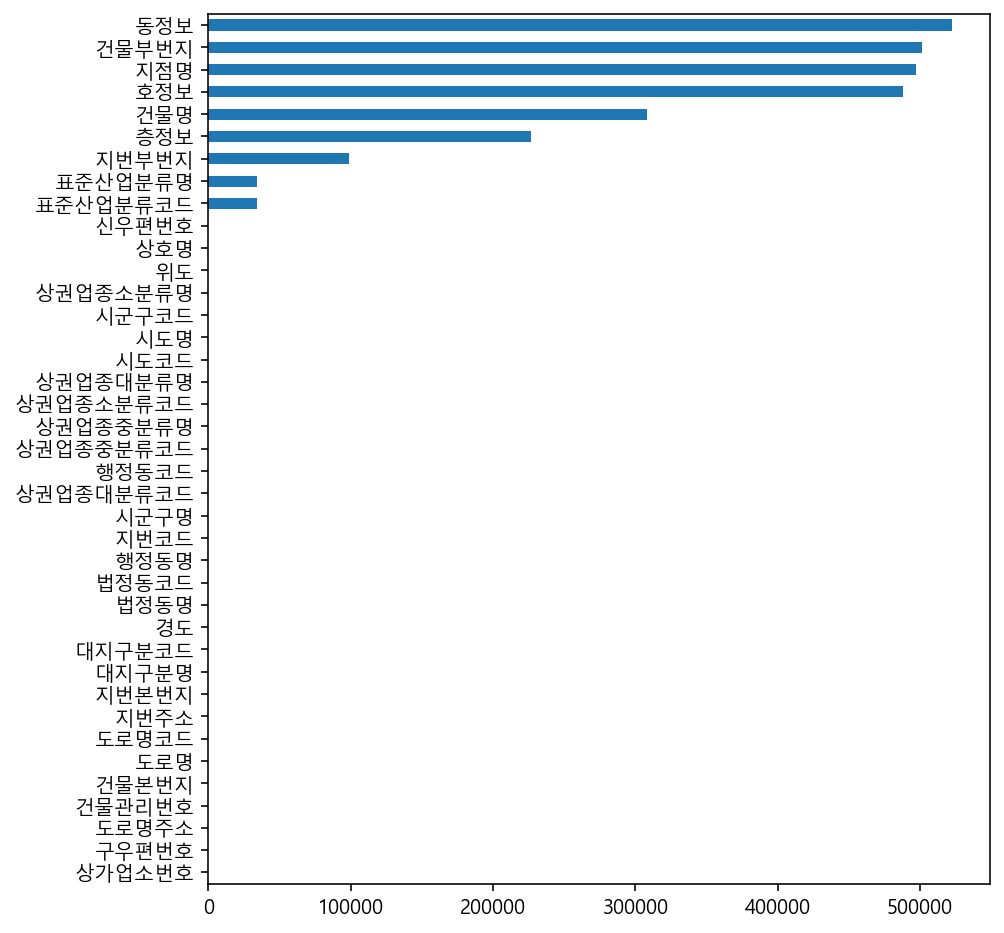

In [9]:
# 결측치 시각화 (결측치 많은 값이 위에 그려지도록 정렬)
n.sort_values().plot.barh(figsize=(7,8))

### missingno 라이브러리로 결측치 시각화

<AxesSubplot:>

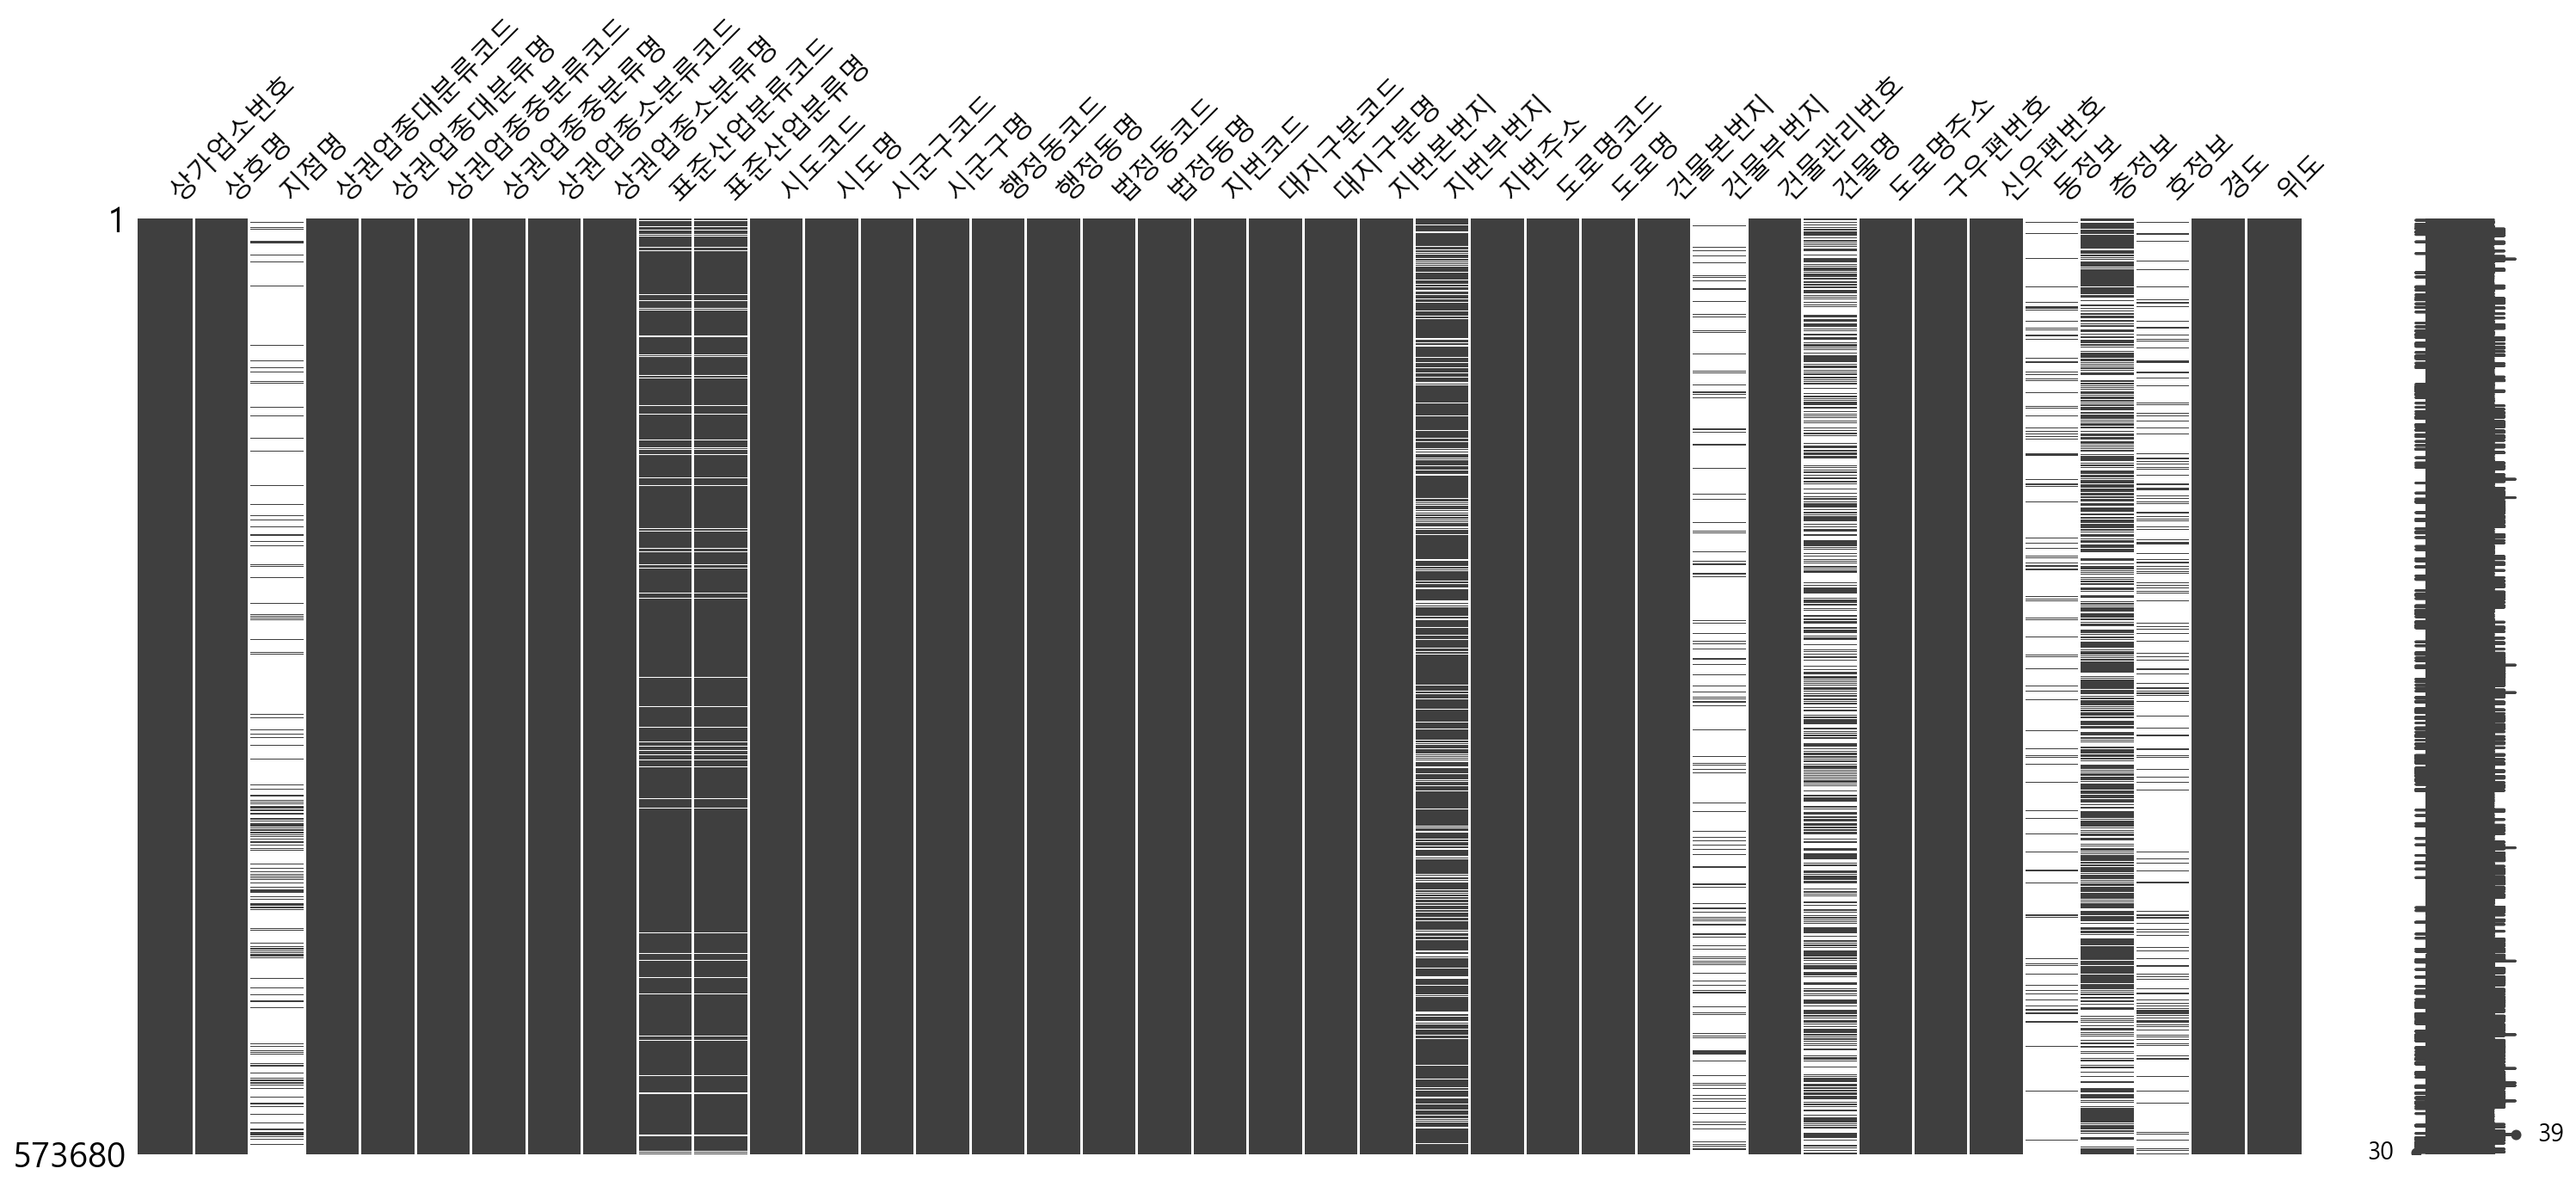

In [10]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

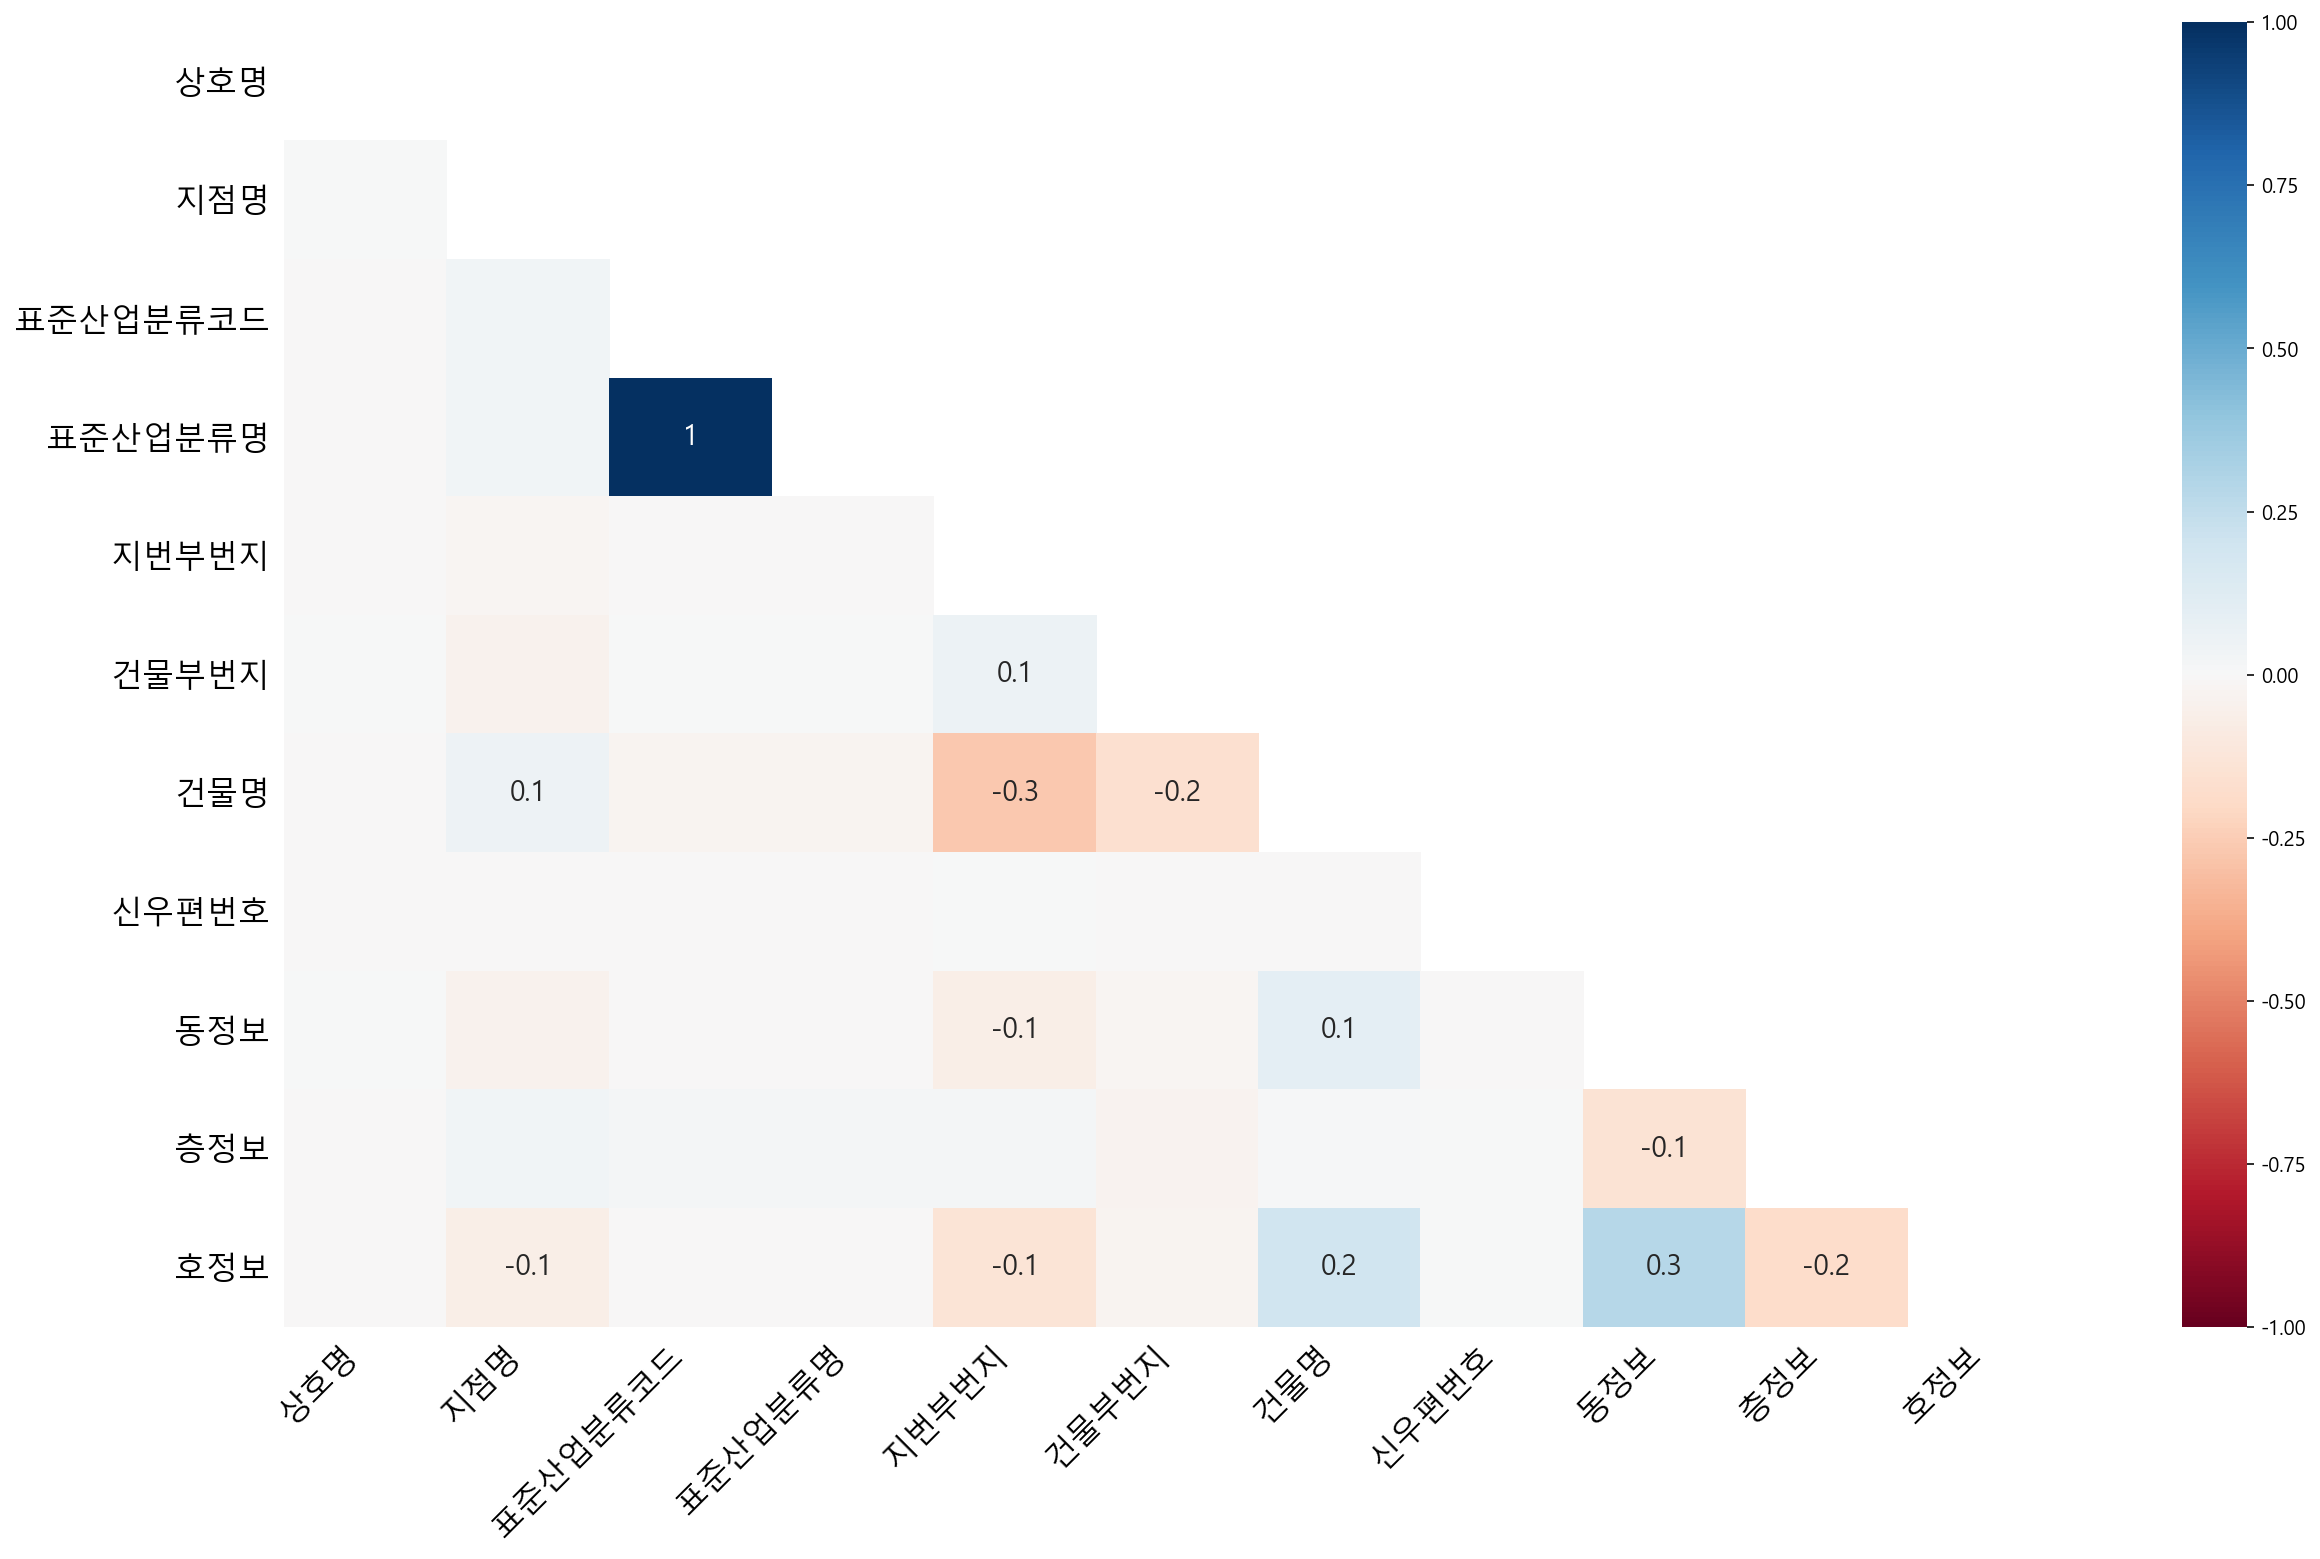

In [11]:
# heatmap 으로 표현
msno.heatmap(df)

<AxesSubplot:>

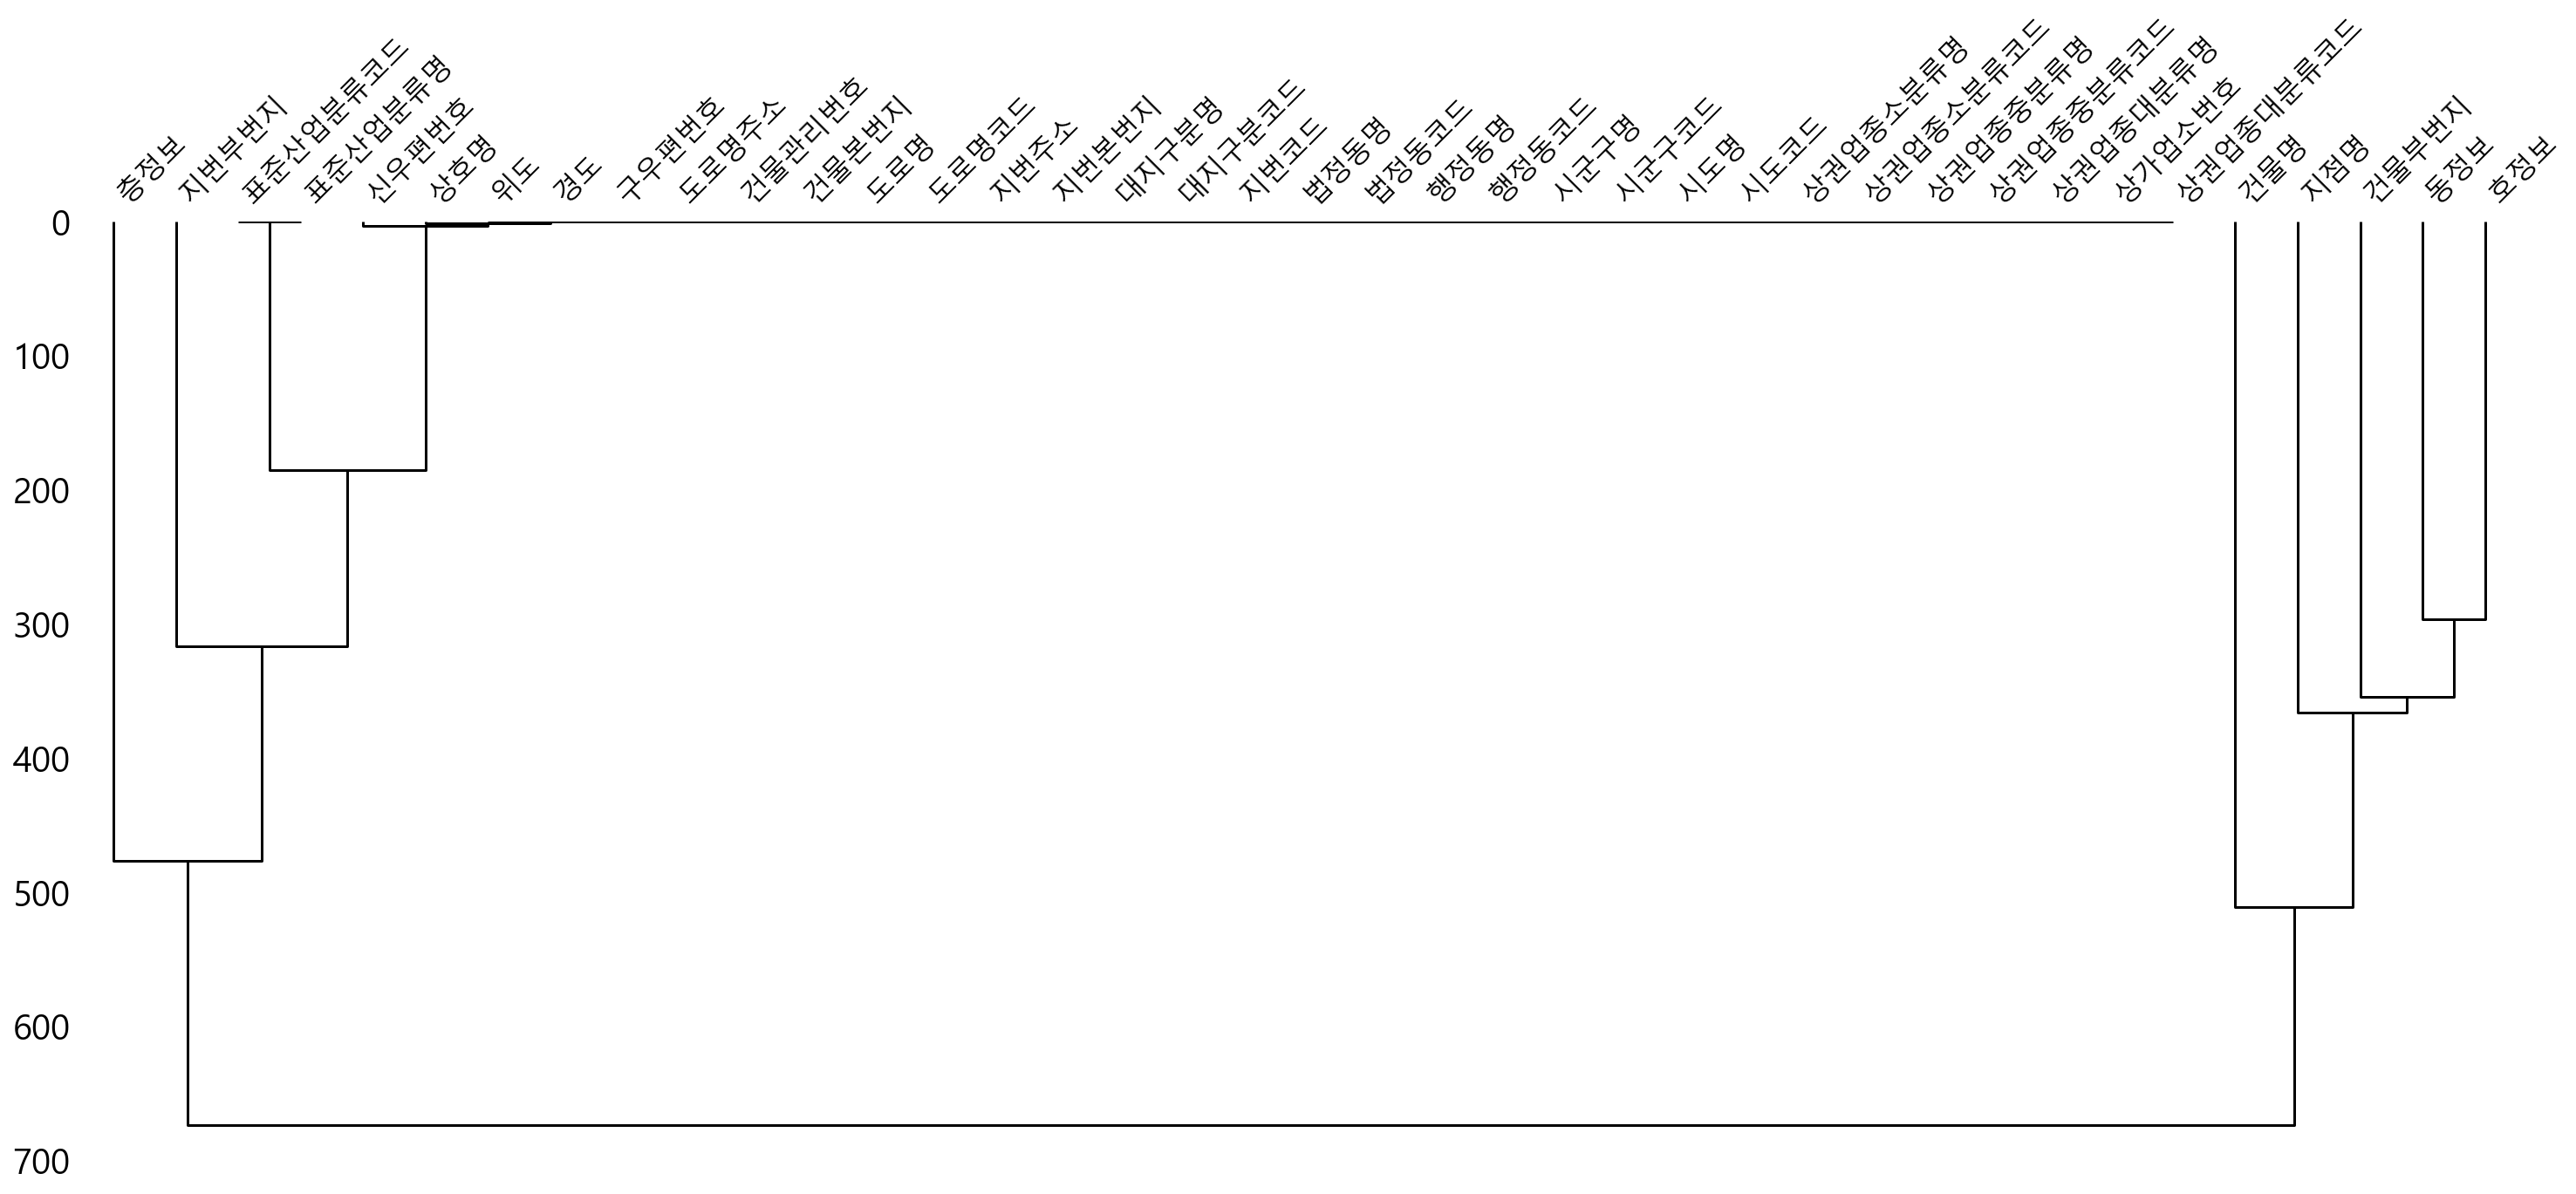

In [12]:
# dendrogram 으로 표현 (군집화하여 표현)
msno.dendrogram(df)

### 사용하지 않는 컬럼 제거

In [13]:
# 결측치가 너무 많은 컬럼 9개를 제거
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index    # 이걸 지우고 싶다.
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [14]:
print(df.shape)
df = df.drop(not_use_col, axis=1)    # 컬럼을 기준으로 제거
print(df.shape)

(573680, 39)
(573680, 30)


In [15]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

---

In [16]:
# 코드와 번호가 들어간 컬럼들을 제거한다.
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [17]:
print(df.shape)
df = df.drop(cols_code, axis=1)    # 컬럼을 기준으로 제거
print(df.shape)

(573680, 30)
(573680, 16)


In [18]:
# 사용하는 메모리가 줄어들었음을 확인할 수 있다.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


## 행, 열을 기준으로 값을 가져오기 (loc, iloc)

Pandas에서 두개 이상의 컬럼을 가져오려면 리스트 형태로 지정을 해야한다.

### 열(column) 기준
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 한다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 된다.

In [19]:
# 상호명, 도로명주소 컬럼만 가져오기 
df[["상호명", "도로명주소"]].head()

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71


### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [20]:
# 0 번째 인덱스 행 가져오기
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [21]:
# 0, 1, 2 번째 인덱스 행 가져오기
df.loc[[0, 1, 2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [22]:
# 0번째 행의 "상호명"만 가져오기
df.loc[0, "상호명"]

'와라와라호프'

In [23]:
# 0, 1, 2 번째 행의 "상호명" "도로명주소" 가져오기
df.loc[[0, 1, 2], ["상호명", "도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져온다.
* df.iloc[행, 열] 순으로 인덱스 번호를 지정한다. 
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져온다.

In [24]:
# 위에서 5개의 행과, 왼쪽에서 5개 열을 가져오기
df.iloc[:5, :5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


## 기술통계 값 보기

In [25]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [26]:
# 위도, 경도 컬럼만의 기술통계 값
df[["위도", "경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [27]:
df["위도"].count()
# df["위도"].mean()
# df["위도"].max()    # 최대값
# df["위도"].min()    # 최소값
# df["위도"].quantile(q=0.25)    # 1사분위 수
# df["위도"].quantile    # 2사분위수(25%)
# df["위도"].mdeian()    # 중앙값
# df["위도"].var()    # 분산
# df["위도"].std()    # 표준편차

573680

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

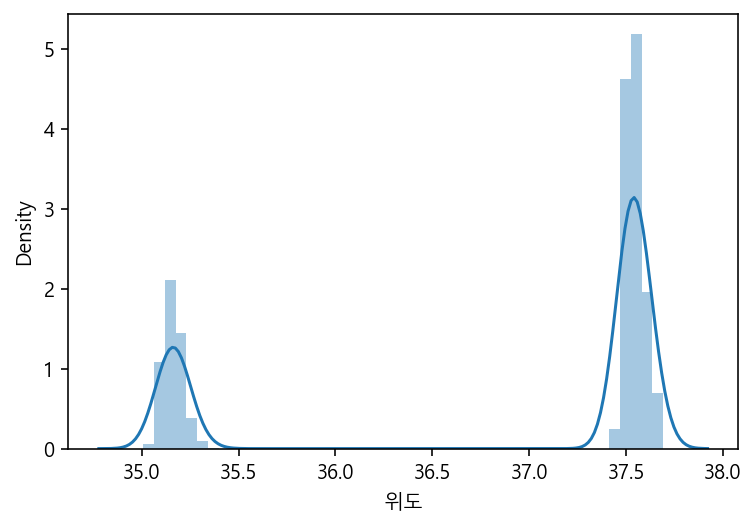

In [28]:
# 위도의 distplot 그리기
sns.distplot(df["위도"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='경도', ylabel='Density'>

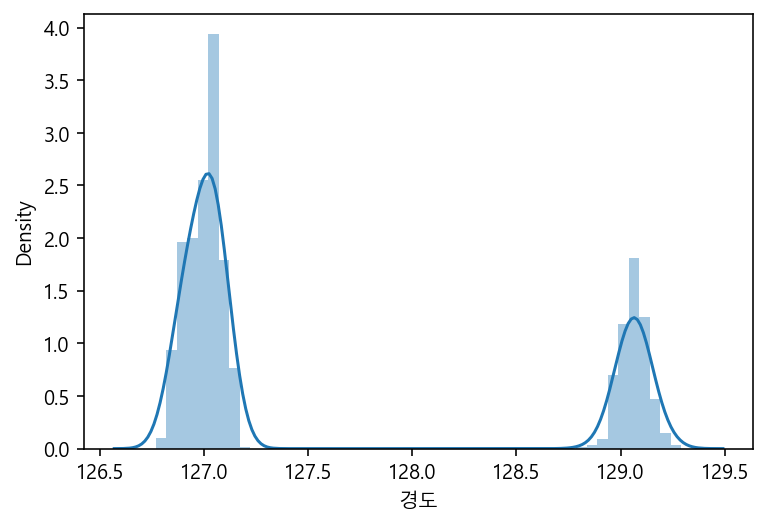

In [29]:
# 경도의 distplot 그리기
sns.distplot(df["경도"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

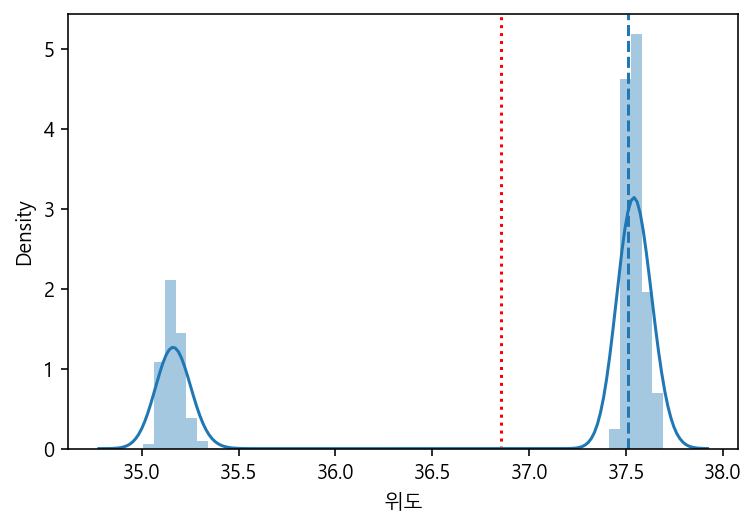

In [30]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을, linestyle 로 점선으로 표시
plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="--")
sns.distplot(df["위도"])

## 상관계수 분석
- 피어슨 상관계수 : 두 변수간의 관련성을 구하기 위해 보편적으로 이용된다.

In [32]:
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


- Heatmap

<AxesSubplot:>

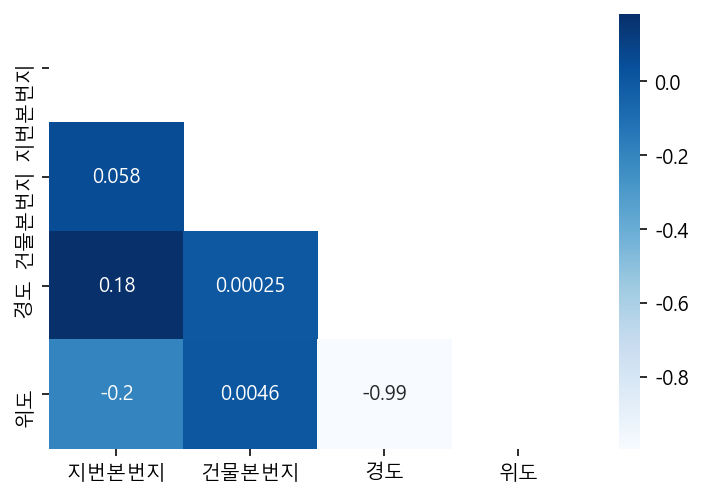

In [40]:
# 상관계수 시각화

mask = np.triu(np.ones_like(corr, dtype=np.bool))    # 한 쪽 대각선으로만 시각화해주는 코드
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

- Sctterplot
- Regplot (회귀선을 추가)

<AxesSubplot:xlabel='경도', ylabel='위도'>

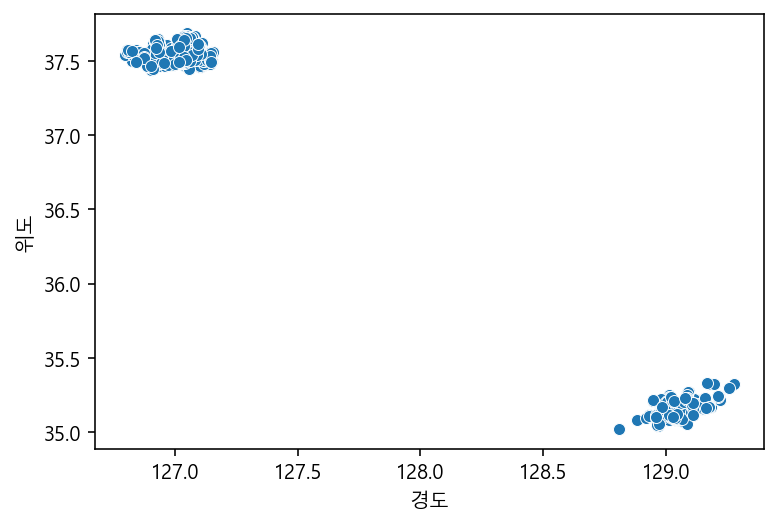

In [42]:
# 하나하나 점을 찍어주기 때문에 sample 1000개만 뽑음
sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

경도와 위도는 강한 음의 상관관계를 가지고 있음을 확인할 수 있다.

<AxesSubplot:xlabel='경도', ylabel='위도'>

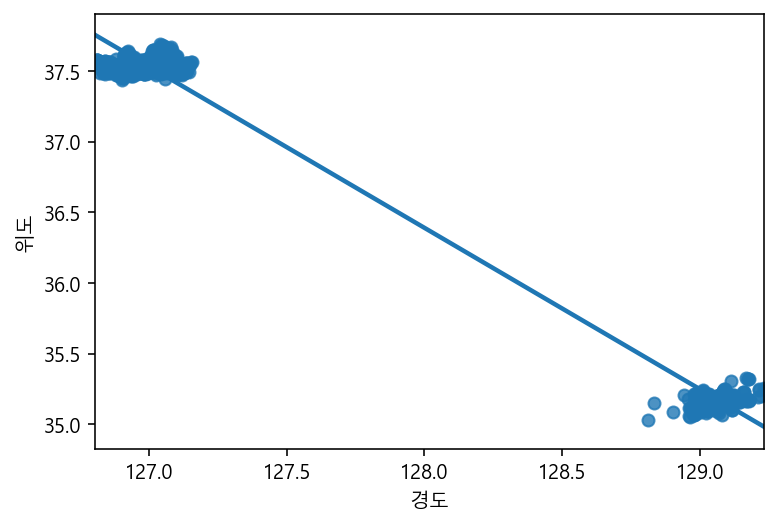

In [43]:
sns.regplot(data=df.sample(1000), x="경도", y="위도")


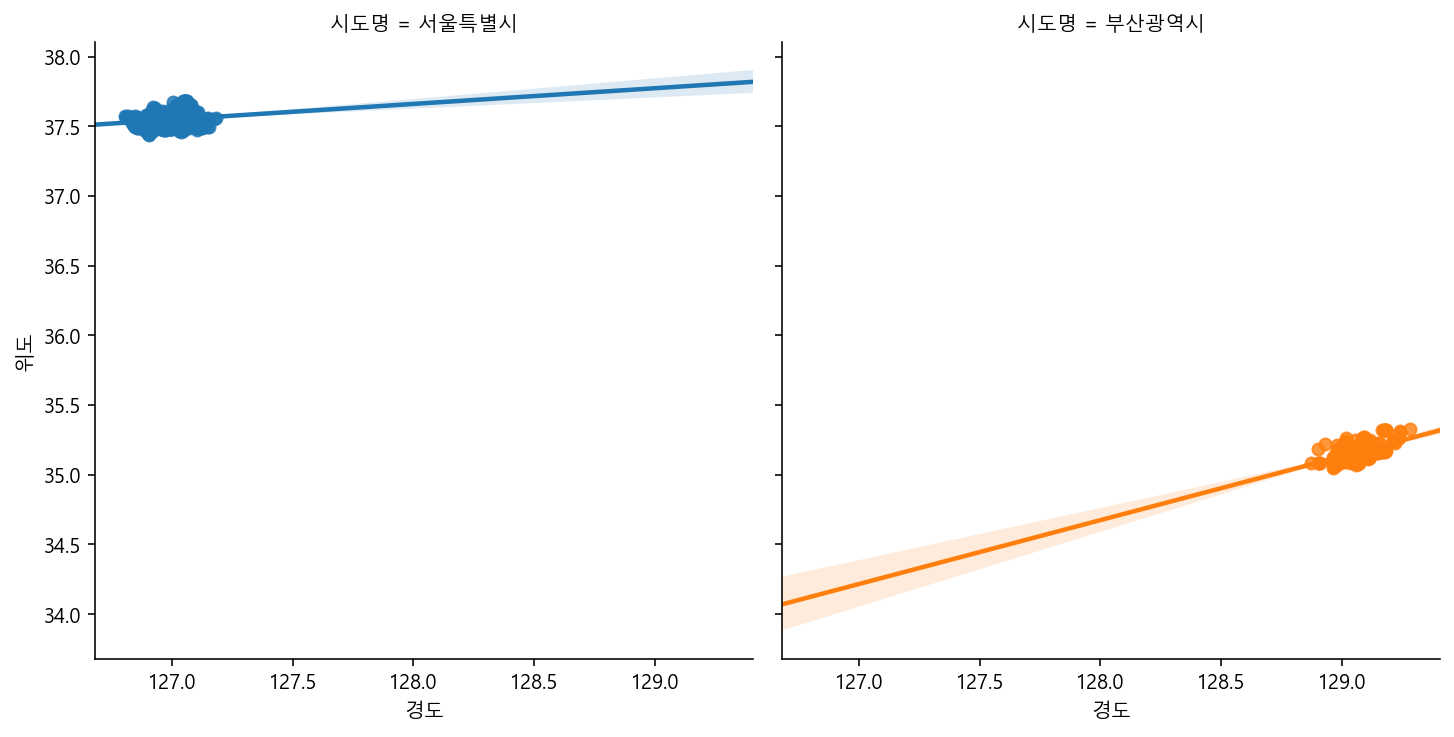

In [52]:
sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명", col="시도명", truncate=False)     # truncate False로 지정해주어 회귀선 타나나도록

## object 타입의 데이터 요약

In [55]:
# inclue="object" 로 문자열 데이터에 대한 요약을 볼 수 있다.
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [59]:
df["상권업종대분류명"].describe()
# df["상권업종대분류명"].unique()    # unique 값
# df["상권업종대분류명"].nunique()    # unique 값의 갯수
# df["상권업종대분류명"].mode()    # 최빈값 구하기
# df["상권업종대분류명"].value_counts()    # 고유값들의 빈도수 구하기 / value_counts()는 시리즈 데이터만 적용가능한 판다스의 함수이다.

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64